In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [68]:
X = data.iloc[:,2:4]

In [69]:
X.shape

(400, 2)

In [70]:
y = data.iloc[:,-1]

In [71]:
y.shape

(400,)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

In [74]:
x_train.shape

(320, 2)

In [75]:
x_test.shape

(80, 2)

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [77]:
x_train = scaler.fit_transform(x_train)

In [78]:
x_test = scaler.fit_transform(x_test)

In [79]:
#first method 
k = int(np.sqrt(x_train.shape[0]))

In [80]:
k

17

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)

In [82]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [83]:
y_pred = knn.predict(x_test)

In [84]:
y_pred.shape

(80,)

In [85]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [86]:
confusion_matrix(y_test,y_pred)

array([[50,  5],
       [ 4, 21]])

In [87]:
accuracy_score(y_test, y_pred)

0.8875

In [88]:
f1_score(y_test,y_pred)

0.8235294117647058

In [89]:
#2nd method

accuracy=[]

for i in range(1,26):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train,y_train)
        y_pred = knn.predict(x_test)
        accuracy.append(accuracy_score(y_test, y_pred))

In [90]:
accuracy

[0.825,
 0.825,
 0.825,
 0.85,
 0.8625,
 0.8625,
 0.875,
 0.875,
 0.875,
 0.9,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.9,
 0.9,
 0.8875,
 0.9,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875]

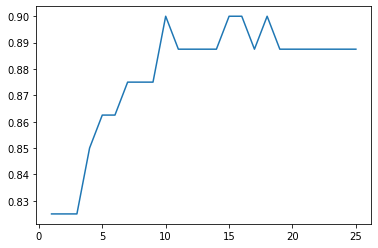

In [91]:
plt.plot(range(1,26), accuracy)